In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes

In [11]:
import descartes

In [22]:
user='S'

if user=='S':
    df=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/liste_mandat.csv")#on récupère le csv de la liste des mandats
    df_depu=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/listeDepute_complete.csv")

if user=='G':
    df=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
    df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/listeDepute_complete.csv")


In [23]:
debut_mandat=[]
for dates in df["Mandat"]:
    dates=str(dates).split()
    debut_mandat.append(' '.join(dates[1:4]))
    
df["Debut Mandat"]=np.array(debut_mandat)
df.head()

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom,Debut Mandat
0,0,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,Damien Meslot,19 juin 2002
1,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,Damien Meslot,20 juin 2007
2,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIVe législature,Du 20 juin 2012 au 20 juin 2017,Cinquième République - Assemblée nationale,Damien Meslot,20 juin 2012
3,0,Ille-et-Vilaine,La République en Marche,XVe législature (Législature en cours),Depuis le 21 juin 2017 (mandat en cours),Cinquième République - Assemblée nationale,Christine Cloarec-Le Nabour,le 21 juin
4,0,Ardèche,Socialiste,XIe législature,Du 1er juin 1997 au 18 juin 2002,Cinquième République - Assemblée nationale,Pascal Terrasse,1er juin 1997


In [24]:
mandat_dep=df.sort_values(by='Département')
mandat_dep.head()

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom,Debut Mandat
28119,0,Ain,Majorité ministérielle,IVe législature,Du 24 novembre 1827 au 16 mai 1830,Seconde Restauration - Chambre des députés des...,"Jean-Baptiste, Antoine Georgette du Buisson de...",24 novembre 1827
7717,0,Ain,Mouvement républicain populaire,Ire Assemblée nationale constituante,Du 21 octobre 1945 au 10 juin 1946,Gouvernement provisoire de la République franç...,"Pierre, Hector Dominjon",21 octobre 1945
5277,0,Ain,Socialiste,VIIe législature,Du 2 juillet 1981 au 1er avril 1986,Cinquième République - Assemblée nationale,Louis Robin,2 juillet 1981
30945,0,Ain,Droite,IIIe législature,Du 6 mars 1824 au 5 novembre 1827,Seconde Restauration - Chambre des députés des...,"Claude, Marie, Joseph Dumarché-Bolozon",6 mars 1824
30944,0,Ain,Droite,IIe législature,Du 20 novembre 1822 au 24 décembre 1823,Seconde Restauration - Chambre des députés des...,"Claude, Marie, Joseph Dumarché-Bolozon",20 novembre 1822


In [25]:
df_depu.head()

,Unnamed: 0,Nom,Né le,Département de naissance,Département de mort
0,0,Damien Meslot,11 novembre 1964,Inconnu,Inconnu
1,1,Pierre-Yves Le Borgn',4 novembre 1964,Finistère,Inconnu
2,2,Christine Cloarec-Le Nabour,28 octobre 1964,Inconnu,Inconnu
3,3,Malek Boutih,27 octobre 1964,Inconnu,Inconnu
4,4,Pascal Terrasse,26 octobre 1964,Gard,Inconnu


<b> TRANSTYPAGE !!! (Je suis heureux que ça ait marché) 

In [26]:
df_depu[["Nom","Né le"]].head(2)
mandat_dep[["Nom","Debut Mandat"]].head(2)
age_dep=mandat_dep.set_index('Nom').join(df_depu[["Nom","Né le"]].set_index('Nom'), on='Nom')
dates=[]
mandat_dep.reset_index()
mois={'janvier':1,'février':2, 'mars':3, 'avril':4, 'mai':5, 'juin':6, 'juillet':7, 'août':8, 'septembre':9, 'octobre':10, 'novembre':11, 'décembre':12}
def transtype_date(x):
    x=str(x)        
    date_texte=x.split() 
    if len(date_texte)>1 :
        if  date_texte[1] in (mois.keys()):
            if date_texte[0]=="1er":
                date_texte[0]='1'
            date_texte[1]=str(mois[date_texte[1]])
            date_nombre='/'.join(date_texte)
            return pd.to_datetime(date_nombre)
    else:
        return pd.NaT

def nul(x):#pourquoi ?
    return 0
age_dep["Date de naissance"]=age_dep["Né le"].apply(lambda x: transtype_date(x))
age_dep["Date debut mandat"]=age_dep["Debut Mandat"].apply(lambda x: transtype_date(x))
age_dep.head(2)

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Debut Mandat,Né le,Date de naissance,Date debut mandat
Nom,,,,,,,,,,
"Jean-Baptiste, Antoine Georgette du Buisson de La Boulaye",0,Ain,Majorité ministérielle,IVe législature,Du 24 novembre 1827 au 16 mai 1830,Seconde Restauration - Chambre des députés des...,24 novembre 1827,12 novembre 1781,1781-12-11,1827-11-24
"Pierre, Hector Dominjon",0,Ain,Mouvement républicain populaire,Ire Assemblée nationale constituante,Du 21 octobre 1945 au 10 juin 1946,Gouvernement provisoire de la République franç...,21 octobre 1945,8 octobre 1910,1910-08-10,1945-10-21


In [27]:
#A convertir en année
(age_dep["Date debut mandat"][1]-age_dep["Date de naissance"][1])

Timedelta('12856 days 00:00:00')

In [28]:
age_dep.head(2)

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Debut Mandat,Né le,Date de naissance,Date debut mandat
Nom,,,,,,,,,,
"Jean-Baptiste, Antoine Georgette du Buisson de La Boulaye",0,Ain,Majorité ministérielle,IVe législature,Du 24 novembre 1827 au 16 mai 1830,Seconde Restauration - Chambre des députés des...,24 novembre 1827,12 novembre 1781,1781-12-11,1827-11-24
"Pierre, Hector Dominjon",0,Ain,Mouvement républicain populaire,Ire Assemblée nationale constituante,Du 21 octobre 1945 au 10 juin 1946,Gouvernement provisoire de la République franç...,21 octobre 1945,8 octobre 1910,1910-08-10,1945-10-21


In [10]:
mandat_dep['âge député']=mandat_dep[df_depu['Né le'][df_depu['Nom'==mandat_dep[mandat_dep['Nom']]]]-mandat_dep['date']]

KeyError: "None of [Index(['Jean-Baptiste, Antoine Georgette du Buisson de La Boulaye',\n       'Pierre, Hector Dominjon', 'Louis Robin',\n       'Claude, Marie, Joseph Dumarché-Bolozon',\n       'Claude, Marie, Joseph Dumarché-Bolozon', 'Joseph Chatagner',\n       'Dominique Saint-Pierre', 'Joseph Chatagner',\n       'Jacques, Henri, Marie Maissiat', 'Pierre, Hector Dominjon',\n       ...\n       'Julien Palasne de Champeaux', 'Marc, Florent Prévot',\n       'François Armand', 'Jacques, Bernardin Colaud de la Salcette',\n       'Jean-Baptiste Royer', 'Jean-Baptiste, Pierre dit Jean-Pierre Saurine',\n       'Jean-Pierre Girod de Thoiry', 'Théodore Vernier de Montorient',\n       'Jean-Marie Bion', 'Pierre, Toussaint Durand de Maillane'],\n      dtype='object', length=36128)] are in the [columns]"

In [29]:
dep_possible=list(mandat_dep['Département'].unique())[:-1]#une liste de tous les départements mentionnés sans les Nan
dep_possible.remove(" Département d'élection inconnu")
#dep_possible=[i[1:] for i in dep_possible]#on supprime les espaces
dep_possible

[' Ain',
 ' Aisne',
 ' Allier',
 ' Alpes-Maritimes',
 ' Alpes-de-Haute-Provence',
 " Anciens départements d'Algérie",
 ' Ardennes',
 ' Ardèche',
 ' Ariège',
 ' Aube',
 ' Aude',
 ' Aveyron',
 ' Bas-Rhin',
 ' Basses-Alpes',
 ' Basses-Pyrénées',
 ' Bouches-du-Rhône',
 ' Calvados',
 ' Cameroun',
 ' Cantal',
 ' Charente',
 ' Charente-Inférieure',
 ' Charente-Maritime',
 ' Cher',
 ' Citoyens français de Tunisie',
 ' Citoyens français du Maroc',
 ' Cochinchine française',
 ' Comores',
 ' Corrèze',
 ' Corse',
 ' Corse-du-Sud',
 ' Creuse',
 ' Côte française des Somalis',
 " Côte-d'Ivoire",
 " Côte-d'Or",
 " Côtes d'Armor",
 ' Côtes-du-Nord',
 ' Dahomey',
 ' Dahomey-Togo',
 ' Deux-Sèvres',
 ' Dordogne',
 ' Doubs',
 ' Drôme',
 " Départements de l'Empire français aujourd'hui au Luxembourg",
 " Départements de l'Empire français aujourd'hui aux Pays-Bas",
 " Départements de l'Empire français aujourd'hui en Allemagne",
 " Départements de l'Empire français aujourd'hui en Belgique",
 " Départements de 

In [30]:
mandat_dep.count()#on vérifie qu'il n'y a pas trop de manques

Unnamed: 0          36128
Département         35931
Groupe              32005
Législature         36128
Mandat              36128
Régime politique    36126
Nom                 36128
Debut Mandat        36128
dtype: int64

In [31]:
mandat_dep.set_index('Département', inplace=True)#on met département en index pour pouvoir scinder par départements

In [32]:
mandat_dep.reset_index()
x,y,z=[],[],[]
for dep in dep_possible :
    x+=[len(df[df['Département']==dep])]#on compte le nombre total de mandat dans le département
    y+=[len(df[df['Département']==dep]['Nom'].unique())]#Puis le nombre de députés différent par dpt
    z+=[x[-1]/y[-1]] #Ceci est le nombre moyen de mandat par député
    
carac_dep_bis=np.array([x, y, z])#on crée un dataframe avec les informations
table = pd.DataFrame(carac_dep_bis, index=['nombre_mandat', 'nombre député','nombre moyen de mandats par député'],columns=dep_possible)
table.head()



,Ain,Aisne,Allier,Alpes-Maritimes,Alpes-de-Haute-Provence,Anciens départements d'Algérie,Ardennes,Ardèche,Ariège,Aube,...,Val-d'Oise,Val-de-Marne,Var,Vaucluse,Vendée,Vienne,Vosges,Wallis-et-Futuna,Yonne,Yvelines
nombre_mandat,328.000000,447.000000,308.000000,257.00,9.000000,316.00000,275.000000,295.000000,192.000000,267.000000,...,87.000000,133.000000,343.000000,257.000000,351.000000,305.000000,355.000000,11.000000,327.00000,165.000000
nombre député,145.000000,190.000000,159.000000,100.00,7.000000,207.00000,130.000000,132.000000,88.000000,119.000000,...,39.000000,48.000000,167.000000,118.000000,147.000000,133.000000,159.000000,3.000000,147.00000,73.000000
nombre moyen de mandats par député,2.262069,2.352632,1.937107,2.57,1.285714,1.52657,2.115385,2.234848,2.181818,2.243697,...,2.230769,2.770833,2.053892,2.177966,2.387755,2.293233,2.232704,3.666667,2.22449,2.260274


In [33]:
table.columns

Index([' Ain', ' Aisne', ' Allier', ' Alpes-Maritimes',
       ' Alpes-de-Haute-Provence', ' Anciens départements d'Algérie',
       ' Ardennes', ' Ardèche', ' Ariège', ' Aube',
       ...
       ' Val-d'Oise', ' Val-de-Marne', ' Var', ' Vaucluse', ' Vendée',
       ' Vienne', ' Vosges', ' Wallis-et-Futuna', ' Yonne', ' Yvelines'],
      dtype='object', length=157)

In [34]:
print(min(table.loc['nombre moyen de mandats par député'][table.loc['nombre député']>40]))
print(max(table.loc['nombre moyen de mandats par député'][table.loc['nombre député']>40]))
print((table.loc['nombre moyen de mandats par député'][table.loc['nombre député']>40]).mean())
print((table.loc['nombre moyen de mandats par député'][table.loc['nombre moyen de mandats par député']<2][table.loc['nombre député']>40]).count())

1.0
2.8275862068965516
2.228066883810941
6


In [35]:
table.loc['nombre moyen de mandats par député'][table.loc['nombre moyen de mandats par député']<2][table.loc['nombre député']>40]

 Allier                                                       1.937107
 Anciens départements d'Algérie                               1.526570
 Basses-Alpes                                                 1.977778
 Départements de l'Empire français aujourd'hui en Belgique    1.180723
 Départements de l'Empire français aujourd'hui en Italie      1.000000
 Meurthe                                                      1.945946
Name: nombre moyen de mandats par député, dtype: float64

Les valeurs les plus basses sont constituées par des départements qui ont appartenu peu de temps à la France, et où les occasions de se faire réélire ont donc été peu nombreuses.

In [36]:
table.loc['nombre moyen de mandats par député'][table.loc['nombre moyen de mandats par député']>2.5][table.loc['nombre député']>40]

 Alpes-Maritimes      2.570000
 Charente-Maritime    2.533333
 Haute-Savoie         2.827586
 Hauts-de-Seine       2.746269
 Landes               2.548077
 Orne                 2.510949
 Savoie               2.593750
 Seine-St-Denis       2.566038
 Val-de-Marne         2.770833
Name: nombre moyen de mandats par député, dtype: float64

Au contraire, les départements où il y a le plus de réélections ne semblent pas avoir de problèmes de ce type.

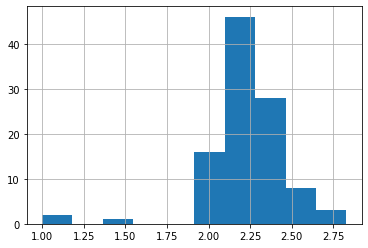

In [37]:
table.loc['nombre moyen de mandats par député'][table.loc['nombre député']>40].hist()

In [38]:
#récupération d'une carte des départements français
import requests
import tempfile
import zipfile


In [39]:
temporary_location = tempfile.gettempdir()
print(temporary_location)
def download_unzip(url, dirname =temporary_location, destname = "borders"):
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref: 
        zip_ref.extractall(dirname + '/' + destname)
download_unzip('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')

C:\Users\sylva\AppData\Local\Temp


In [40]:
carte_departement = gpd.read_file(tempfile.gettempdir() + "/borders/departements-20140306-100m.dbf")
carte_departement_metrop = carte_departement.loc[0:95]

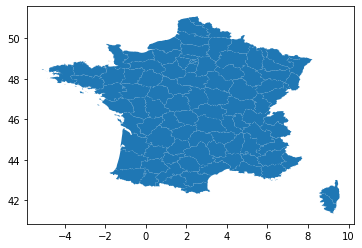

In [41]:
carte_departement_metrop.plot()

In [42]:
carte_departement_metrop.head(2)

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,fr:Ain (département),"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."
1,02,Aisne,FR221,fr:Aisne (département),"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ..."


In [47]:
table.columns=[i[1:] for i in table.columns]#on enlève l'espace devant le nom des départements

In [56]:
table.T.head()

,nombre_mandat,nombre député,nombre moyen de mandats par député
Ain,328.0,145.0,2.262069
Aisne,447.0,190.0,2.352632
Allier,308.0,159.0,1.937107
Alpes-Maritimes,257.0,100.0,2.570000
Alpes-de-Haute-Provence,9.0,7.0,1.285714


In [57]:
carte_departement_metrop.set_index('nom', inplace=True)#on met le nom du département en index pour pouvoir joindre les bases

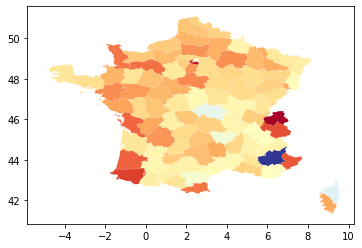

In [59]:
df = carte_departement_metrop.merge(table.T, how = 'inner', left_index=True, right_index=True)
df.plot(column = 'nombre moyen de mandats par député', cmap = 'RdYlBu_r')